In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import nbgwas
from nbgwas.nbgwas import Nbgwas

In [3]:
import warnings 
warnings.filterwarnings("ignore")

In [4]:
nbgwas.__version__

'0.3.1'

# Gene Level Summary

In [5]:
%%time

gene_level_summary_file = '../data/scz/gene_level_summary_stats_pmid_25056061.txt'
g = Nbgwas().read_gene_table(gene_level_summary_file)

CPU times: user 78.6 ms, sys: 18.5 ms, total: 97.1 ms
Wall time: 132 ms


In [6]:
%%time

g.read_nx_pickle_file('../data/networks/pcnet.pkl')

CPU times: user 2.99 s, sys: 862 ms, total: 3.85 s
Wall time: 4.12 s


In [7]:
g.gene_level_summary.head()

,Gene,Chr,Gene Start,Gene End,nSNPs,TopSNP,TopSNP Pos,TopSNP P-Value,SNP Distance
0,HIST1H4K,6,27906930,27907284,8,rs34706883,27913234.0,5.071180e-10,6304.0
1,HIST1H2AK,6,27913636,27914096,16,rs34706883,27913234.0,5.071180e-10,402.0
2,HIST1H2BN,6,27914418,27914867,17,rs34706883,27913234.0,5.071180e-10,1184.0
3,HIST1H2AL,6,27941085,27941555,10,rs13199772,27942064.0,7.053790e-10,979.0
4,HIST1H1B,6,27942548,27943338,10,rs13199772,27942064.0,7.053790e-10,484.0


In [8]:
%%time 

g.cache_network_data() #this loads the adjacency matrix and laplacian matrix in memory
                       #Makes subsequent diffusions very fast

CPU times: user 23.4 s, sys: 2.96 s, total: 26.3 s
Wall time: 27.1 s


In [9]:
g.convert_to_heat(method='neg_log', name='Negative Log') 

In [10]:
g.heat.head()

,Negative Log
UBE2Q1,3.049072
RNF14,3.184936
UBE2Q2,1.235095
RNF10,2.250201
RNF11,1.908012


In [11]:
g.diffuse(method='random_walk', alpha=0.2, heat='Negative Log', result_name='Test')

(1, 19781)
(19781, 1)


In [12]:
g.heat.head()

,Negative Log,Test
UBE2Q1,3.049072,3.049823
RNF14,3.184936,4.518201
UBE2Q2,1.235095,3.020269
RNF10,2.250201,1.442127
RNF11,1.908012,4.860763


In [44]:
g.reset_cache(mode="results")

In [45]:
g.heat.head() #This should yield an AttributeError

AttributeError: 'Nbgwas' object has no attribute 'heat'

In [46]:
g.convert_to_heat(method='binarize', name='Heat')

In [47]:
%%time 

g.diffuse(method='random_walk', alpha=0.2, result_name='a=0.2')
g.diffuse(method='random_walk', alpha=0.5, result_name='a=0.5')
g.diffuse(method='random_walk', alpha=0.8, result_name='a=0.8')

CPU times: user 3.48 s, sys: 691 ms, total: 4.17 s
Wall time: 3.9 s


In [48]:
g.heat.head()

,Heat,a=0.2,a=0.5,a=0.8
TCF4,1.0,0.231018,0.539516,0.823535
HIST1H2BC,1.0,0.224309,0.526892,0.814440
HIST1H4C,1.0,0.224937,0.526994,0.814388
ZKSCAN3,1.0,0.218205,0.524266,0.814367
HIST1H4J,1.0,0.222313,0.525601,0.813903


In [57]:
g.annotate_network(values="all")

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1245f9400>)

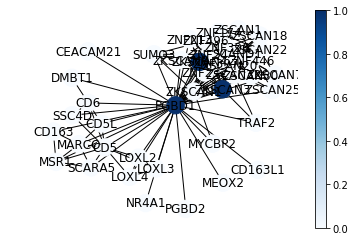

In [62]:
g.get_subgraph("PGBD1", name="PGBD1").view(name="PGBD1", attributes="Heat")

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x159d6c2b0>)

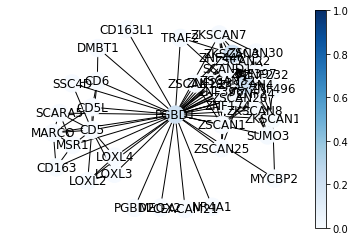

In [63]:
g.view(name="PGBD1", attributes="a=0.2")

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x159add438>)

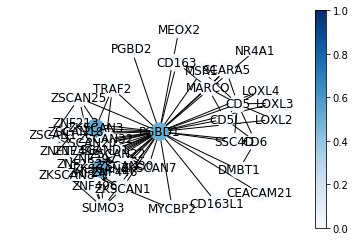

In [64]:
g.view(name="PGBD1", attributes="a=0.5")

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x159cab5f8>)

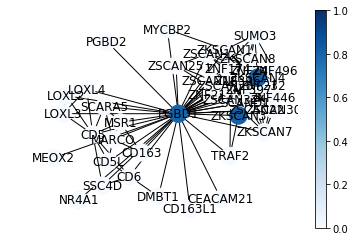

In [65]:
g.view(name="PGBD1", attributes="a=0.8")

# SNP Level Summary

In [66]:
del g

In [67]:
%%time 

snp_level_summary_file = '../data/scz/snp_level_summary_stats_pmid_25056061.txt'
protein_coding_file = '../data/glist-hg18_proteinCoding.txt'

g = Nbgwas() \
    .read_snp_table(snp_level_summary_file) \
    .read_protein_coding_table(protein_coding_file)

CPU times: user 2.98 s, sys: 453 ms, total: 3.43 s
Wall time: 3.51 s


In [69]:
%%time 

g.get_network_from_ndex()

CPU times: user 39.5 s, sys: 8.89 s, total: 48.4 s
Wall time: 1min 5s


In [70]:
g.network

In [71]:
g.snp_level_summary.head()

,snpid,hg18chr,bp,a1,a2,or,se,pval,info,ngt,CEUaf
0,rs3131972,1,742584,A,G,1.0257,0.0835,0.761033,0.1613,0,0.16055
1,rs3131969,1,744045,A,G,1.0221,0.0801,0.784919,0.2225,0,0.133028
2,rs3131967,1,744197,T,C,1.0227,0.0858,0.793520,0.2060,0,.
3,rs1048488,1,750775,T,C,0.9749,0.0835,0.761041,0.1613,0,0.836449
4,rs12562034,1,758311,A,G,1.0011,0.0756,0.987899,0.1856,3,0.0925926


In [72]:
g.protein_coding_table.head()

,Chromosome,Start,End
A1BG,19,63551643,63565932
A1CF,10,52271589,52315441
A2M,12,9111570,9159825
A2ML1,12,8911704,8930864
A3GALT2,1,33544953,33559286


In [73]:
%%time

g.assign_pvalues(window_size=10000)

CPU times: user 4.4 s, sys: 750 ms, total: 5.15 s
Wall time: 5.58 s


In [74]:
g.gene_level_summary.head()

,Gene,Chromosome,Start,End,nSNPS,TopSNP P-Value,TopSNP Position
0,A1BG,19,63551643,63565932,12.0,0.117584,63556880.0
1,A1CF,10,52271589,52315441,21.0,0.247487,52290471.0
2,A2M,12,9111570,9159825,33.0,0.118248,9141868.0
3,A2ML1,12,8911704,8930864,31.0,0.173438,8920953.0
4,A3GALT2,1,33544953,33559286,17.0,0.100226,33551630.0


In [75]:
g.convert_to_heat()

In [76]:
g.heat.head()

,Heat
ZNF165,1.0
BTN3A2,1.0
HIST1H1T,1.0
HIST1H2BJ,1.0
HIST1H2AL,1.0
